## Fashion MNIST

this data set is directly available on tensorflow adn keras library, so that we can import this data set from libraries without downloading.

(clothing Images)


*  it is consist of 60K example for training and 10K examples for test data. Each example is a 28 x 28 grayscale Image, associated woth lable form 10 class.

T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot (starting 0 to 9)


In [1]:
from tensorflow.keras import layers
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.utils import plot_model

In [2]:
# Load train and test dataset

def load_dataset():
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()

# reshape dataset to have single channel
  # shape[0] will give no of data which is 60K we know, image width and hight = 28, color perameter gray = 1
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

# One hot encode target values since problem is multi class(with int 0 to 9), so instead of [0 1 2 3] it will be [1 0 0] for 1, [010] for 2

  trainY = to_categorical(trainY)
  testY = to_categorical(testY)

  return trainX, trainY, testX, testY

pixel values for image dataset are unsigned int range of 0 to 255 (for gray scale)

In [3]:
# Scale Pixels 
def prep_pixels(train,test):

# convert from integers to floats
  train_norm = train.astype('float32')
  test_norm= test.astype('float32')

# normalize to range 0-1 
  train_norm = train_norm / 255.0   # divided by 255 as it was max range for gray scale
  test_norm = test_norm / 255.0

# return normalized range
  return train_norm, test_norm

In [4]:
# define CNN model
def define_model():
  
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))  # stride will be 2 as we didnt define it it will take default null which is same as pool size
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))  # 100 node
  model.add(Dense(10, activation='softmax')) # 10 node in output as we have 10 classes

# Compile model

  # Stocastic gradient descent
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 
  # we are dealing with multiclass classification so we use categorical_crossentropy as loss function
  
  model.summary()
  plot_model(model, to_file = 'CNN_seq.png')
  
  return model

In [5]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
	# save model to use in other files
	model.save('final_model.h5')


In [6]:
# entry point, run the test harness
run_test_harness()

4431872/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainab

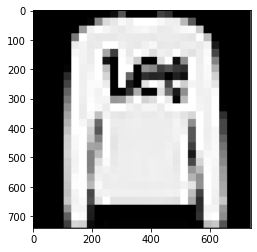



Pullover




/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
# make a prediction for a new image.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

img1 = mpimg.imread('sample_image.png')
imgplot = plt.imshow(img1)
plt.show()
img = load_image("sample_image.png")

model = load_model('final_model.h5') #saved model for this fiel

# predict the class
result = np.argmax(model.predict(img), axis=-1)
print('\n')
if result[0] == 0:
    print("Top")
elif result[0] == 1:
    print("Trouser")
elif result[0] == 2:
    print("Pullover")
elif result[0] == 3:
    print("Dress")
elif result[0] == 4:
    print("Coat")
elif result[0] == 5:
    print("Sandal")
elif result[0] == 6:
    print("Shirt")
elif result[0] == 7:
    print("Sneaker")
elif result[0] == 8:
    print("Bag")
elif result[0] == 9:
    print("Ankle Boot")
else:
    print("Not in the list")
print('\n')